In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [8]:
data = pd.read_csv('C:/Users/user/Desktop/FORE Documents/Courses/Courses Taught in 2022/Machine Learning with Python_2022/Session 16/bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
data.shape

(45211, 17)

In [10]:
category_features = data.select_dtypes(include=['object', 'bool']).columns.values
print(category_features)
for col in category_features:
    print("Unique values in each column",col, "(", len(data[col].unique()) , "values):\n", np.sort(data[col].unique()))

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'y']
('Unique values in each column', 'job', '(', 12, 'values):\n', array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object))
('Unique values in each column', 'marital', '(', 3, 'values):\n', array(['divorced', 'married', 'single'], dtype=object))
('Unique values in each column', 'education', '(', 4, 'values):\n', array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object))
('Unique values in each column', 'default', '(', 2, 'values):\n', array(['no', 'yes'], dtype=object))
('Unique values in each column', 'housing', '(', 2, 'values):\n', array(['no', 'yes'], dtype=object))
('Unique values in each column', 'loan', '(', 2, 'values):\n', array(['no', 'yes'], dtype=object))
('Unique values in each column', 'contact', '(', 3, 'values):\n', array(['cellular', 'te

In [15]:
category_col = ['job','marital','education','default','housing','loan','month','poutcome', 'y']
for col in category_col:
    data[col] =data[col].astype('category')
    data[col] = data[col].cat.codes

In [16]:
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0


In [17]:
X = data.drop(columns=['contact','pdays','y'])
y = data['y']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

-------- k-nearest neighbour

In [20]:
from sklearn.metrics import accuracy_score

In [23]:
from sklearn.neighbors import KNeighborsClassifier

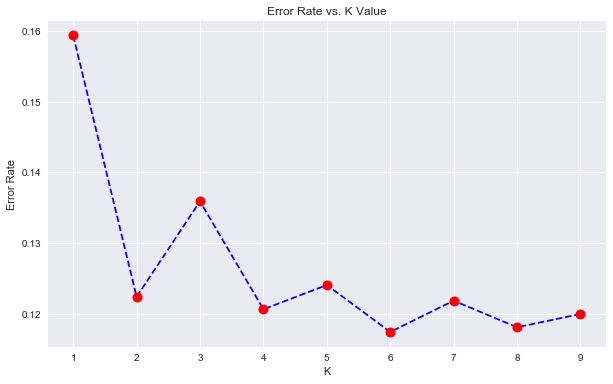

('Minimum error:-', 0.11743890301890969, 'at K =', 6)


In [21]:
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [22]:
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [24]:
y_pred = knn.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.8825610969810903

------------- Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier(max_depth=10,random_state=42)
df.fit(X_train,y_train)
y_pred = df.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8943934534999447


----------------- RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\user\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [28]:
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [29]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8966051089240297


---- Principal Component Analysis 

In [31]:
from sklearn.decomposition import PCA
model=PCA(n_components=2)

#It finds the 2 principle componenets.
model.fit(X)
#reducing 30 features to 2
#Transforms the data into 2 principle components
X_PCA=model.transform(X)
X.shape,X_PCA.shape

((45211, 14), (45211L, 2L))

In [33]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X_PCA, y, random_state=1)

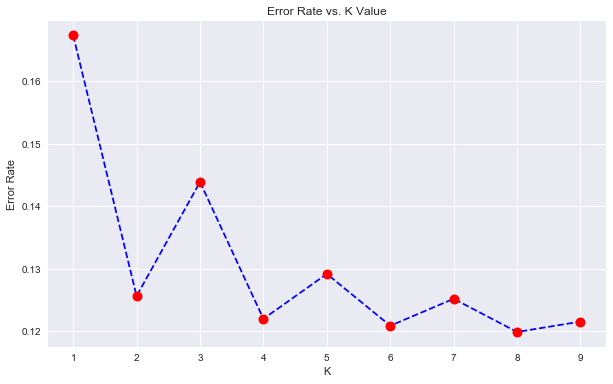

('Minimum error:-', 0.11987172398540302, 'at K =', 8)


In [34]:
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [35]:
knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [36]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.880128276014597

In [37]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier(max_depth=10,random_state=42)
df.fit(X_train,y_train)
y_pred = df.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8816764348114564


In [38]:
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8847727524051753


--- PCA (choosing the optimal number of components)

In [42]:
from sklearn.decomposition import PCA
model1=PCA(n_components=3)

#It finds the 2 principle componenets.
model1.fit(X)
#reducing 30 features to 2
#Transforms the data into 2 principle components
X_PCA=model1.transform(X)
X.shape,X_PCA.shape

((45211, 14), (45211L, 3L))

In [43]:
model1.explained_variance_ratio_

array([9.92877110e-01, 7.09956917e-03, 1.19731304e-05])

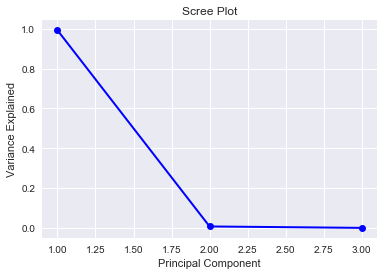

In [44]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(model1.n_components_) + 1
plt.plot(PC_values, model1.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()